# First: explore the data
### Review the unstructured csv files and answer the following questions with code that supports your conclusions:
* Are there any data quality issues present?
* Are there any fields that are challenging to understand?

# Summary of data quality analysis
1. There are not null values in the ID column which is the expected output.
2. There are 291 users with outlier in their birth date which could possible be an entry error.
3. Gender column had lots of same values such as non_binary, not_listed, and prefer_not_to_say in different format or different version.

In [ ]:
# Import necessary libraries and upload the dataset
import pandas as pd
import json
from google.colab import files

uploaded = files.upload()

Saving USER_TAKEHOME.csv to USER_TAKEHOME.csv


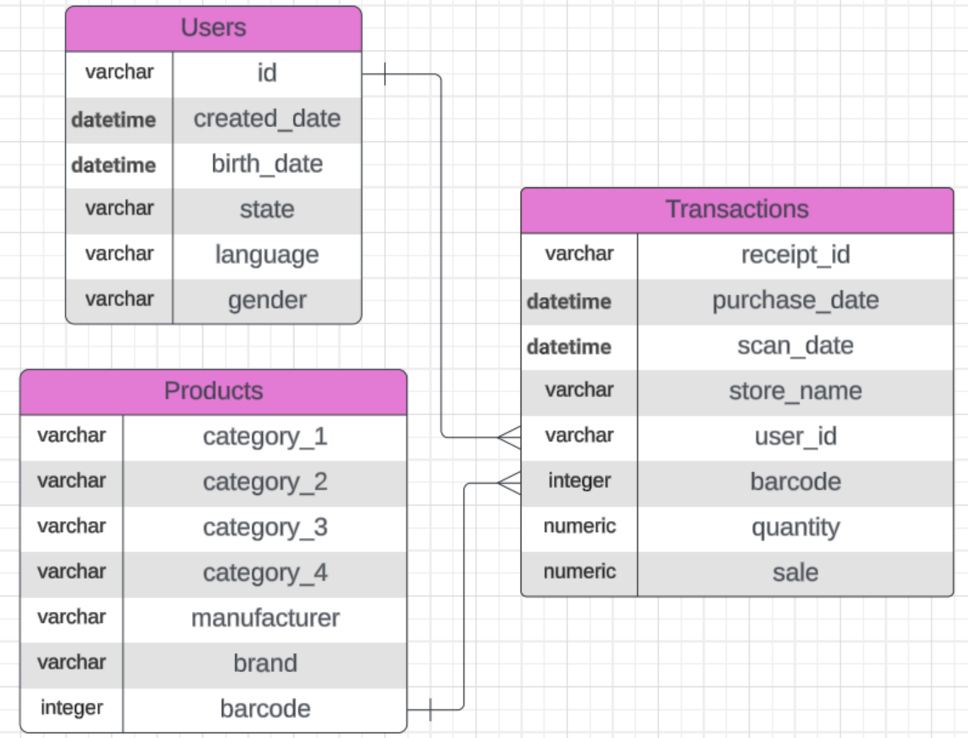

# Users

In [ ]:
filename = list(uploaded.keys())[0]  # Geting the file name


users_df = pd.read_csv(filename)
users_df.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


* Birth_date, state, language, and gender have some null values.


In [ ]:
users_df['ID'].nunique()
# zero duplicates found

100000

In [ ]:
users_df.duplicated().value_counts() # zero duplicates found

,count
False,100000


In [ ]:
users_df['CREATED_DATE'] = pd.to_datetime(users_df['CREATED_DATE'])
users_df['BIRTH_DATE'] = pd.to_datetime(users_df['BIRTH_DATE'])
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


In [ ]:
# check lowest creation date and highest creation date
created_date_min = users_df['CREATED_DATE'].min()
created_date_max = users_df['CREATED_DATE'].max()
birth_date_min = users_df['BIRTH_DATE'].min()
birth_date_max = users_df['BIRTH_DATE'].max()
print("Created Date Range:")
print("Minimum:", created_date_min)
print("Maximum:", created_date_max)

print("\nBirth Date Range:")
print("Minimum:", birth_date_min)
print("Maximum:", birth_date_max)

Created Date Range:
Minimum: 2014-04-18 23:14:55+00:00
Maximum: 2024-09-11 17:59:15+00:00

Birth Date Range:
Minimum: 1900-01-01 00:00:00+00:00
Maximum: 2022-04-03 07:00:00+00:00


### It seems like the minimum age for the Birth Date is year 1900, which seem to be abnormal.
### Average life expectancy of a human being is 80 for male and 84.4 for female.
 *Source: https://www.healthsystemtracker.org/chart-collection/u-s-life-expectancy-compare-countries/#:~:text=In%202022%2C%20the%20CDC%20estimates,before%20the%20COVID%2D19%20pandemic.*


In [ ]:
from datetime import datetime
today = datetime.today()
users_df['age'] = users_df['BIRTH_DATE'].apply(lambda birth_date: today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day)))
# Filter users who are older than 82
older_than_82 = users_df[users_df['age'] > 82.2] # average of 80 and 84.4

# Count the number of users older than 82
num_older_than_82 = len(older_than_82)

print("Number of users older than 82:", num_older_than_82)

Number of users older than 82: 291


### 291 users have outlier in their birth_date

In [ ]:
users_df['STATE'].unique()

array(['CA', 'PA', 'FL', 'NC', 'NY', 'IN', nan, 'OH', 'TX', 'NM', 'PR',
       'CO', 'AZ', 'RI', 'MO', 'NJ', 'MA', 'TN', 'LA', 'NH', 'WI', 'IA',
       'GA', 'VA', 'DC', 'KY', 'SC', 'MN', 'WV', 'DE', 'MI', 'IL', 'MS',
       'WA', 'KS', 'CT', 'OR', 'UT', 'MD', 'OK', 'NE', 'NV', 'AL', 'AK',
       'AR', 'HI', 'ME', 'ND', 'ID', 'WY', 'MT', 'SD', 'VT'], dtype=object)

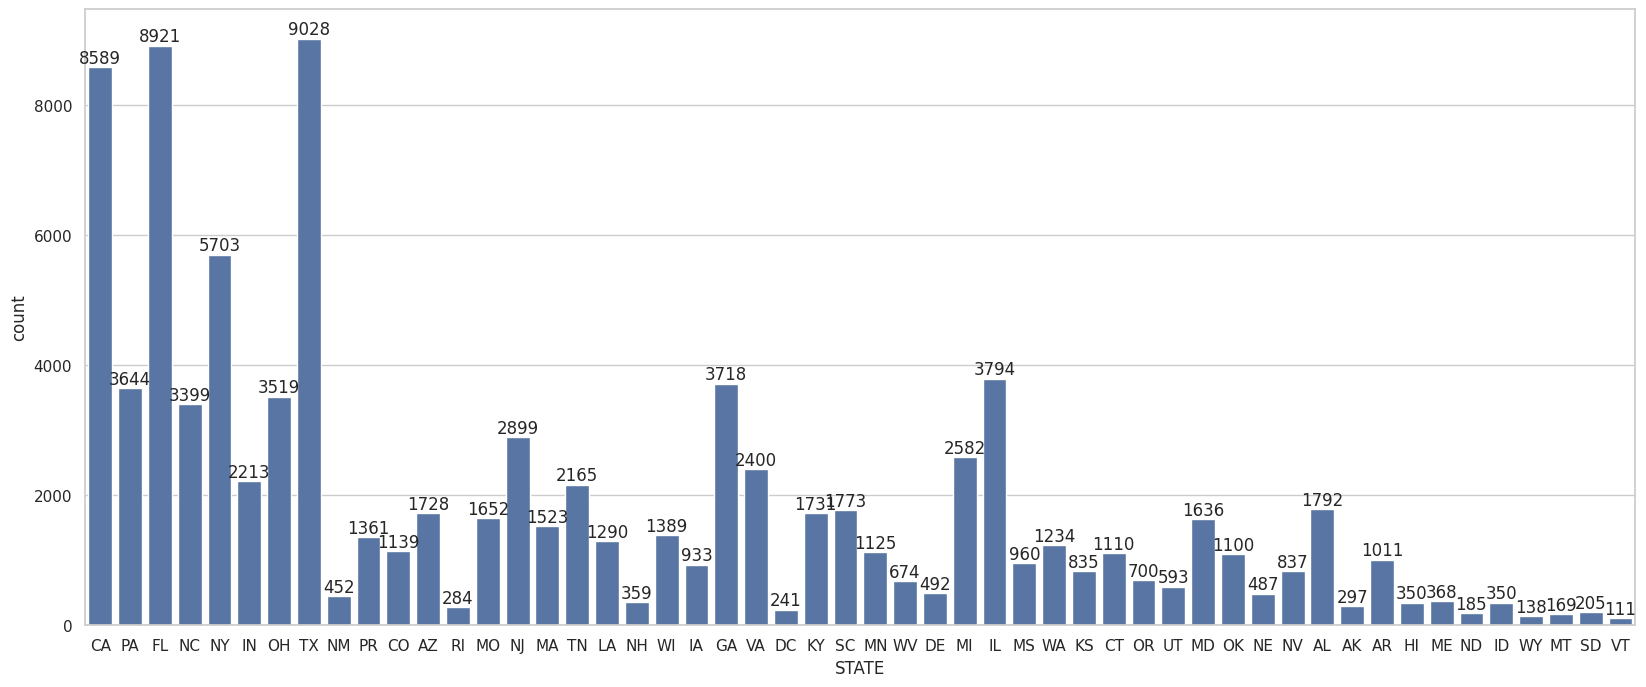

In [ ]:
import seaborn as sns
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='STATE', data=users_df)
for bars in ax.containers:
  ax.bar_label(bars)
# Show the plot
plt.show()

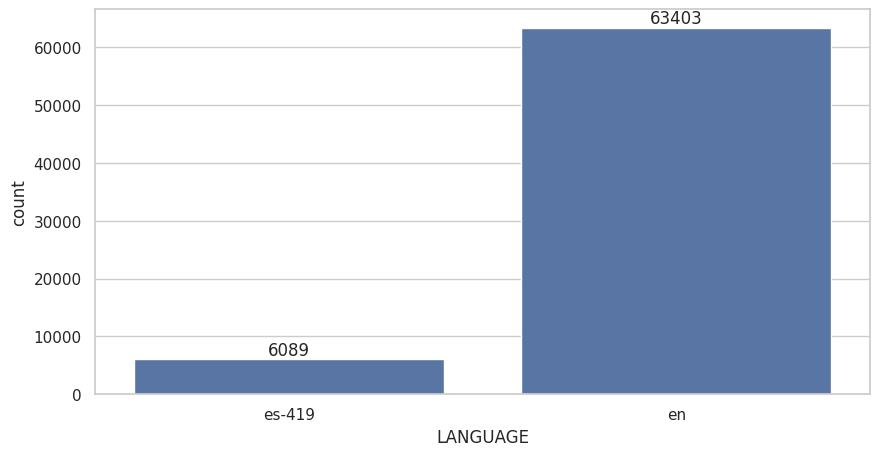

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='LANGUAGE', data=users_df)
for bars in ax.containers:
  ax.bar_label(bars)
# Show the plot
plt.show()

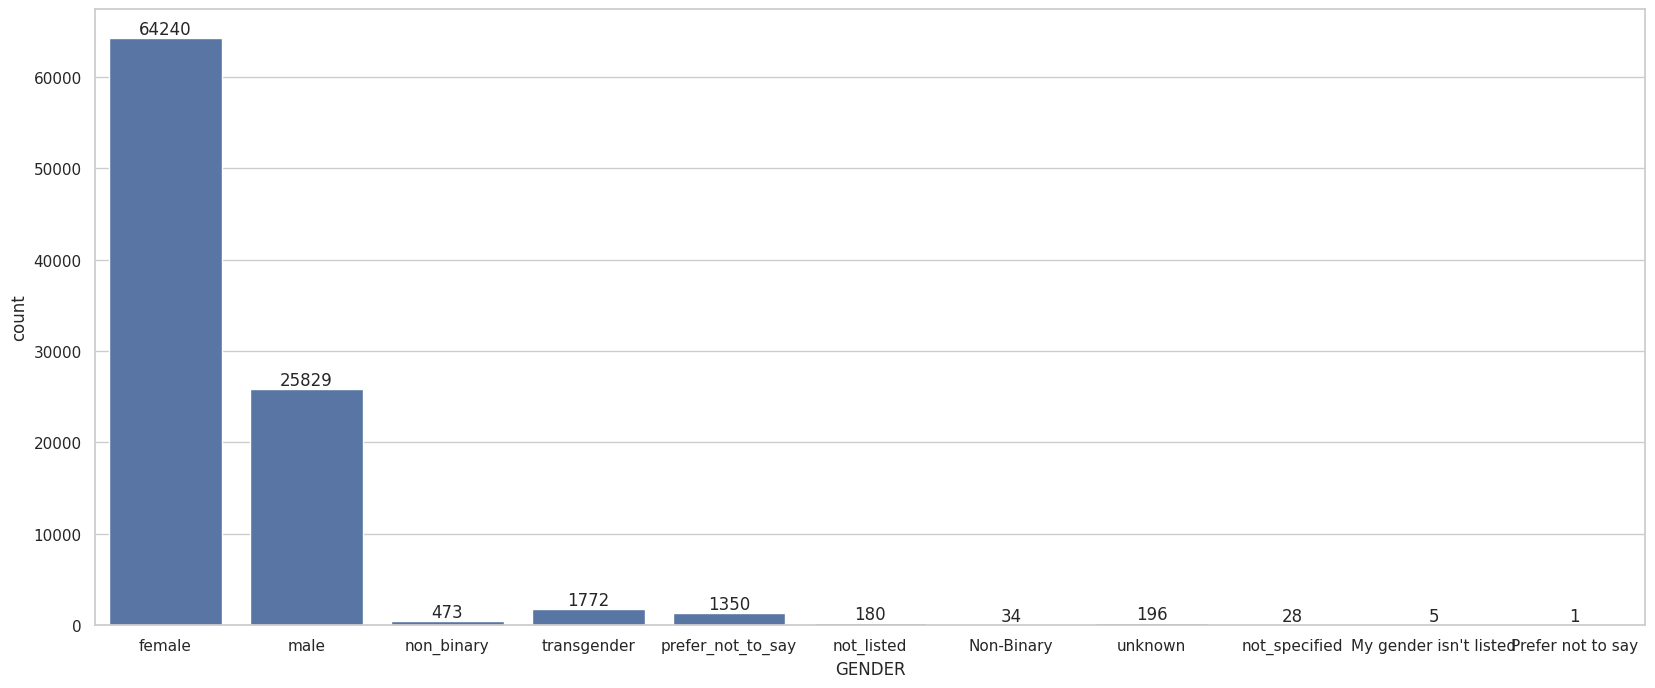

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x='GENDER', data=users_df)
for bars in ax.containers:
  ax.bar_label(bars)
# Show the plot
plt.show()

In [ ]:
users_df['GENDER'].unique()

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

Skipping column 'ID' as it is not numerical or datetime.


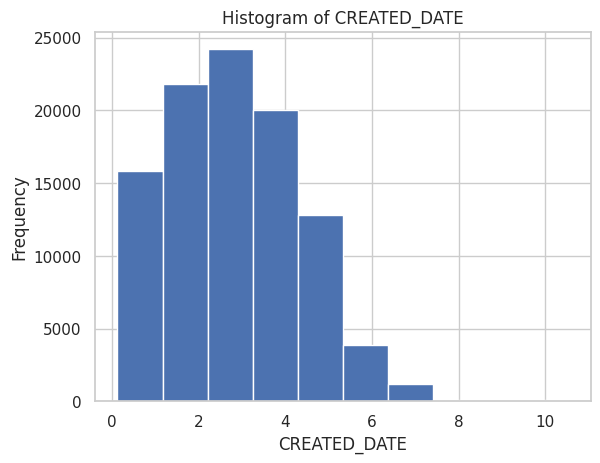

Skipping column 'STATE' as it is not numerical or datetime.
Skipping column 'LANGUAGE' as it is not numerical or datetime.
Skipping column 'GENDER' as it is not numerical or datetime.


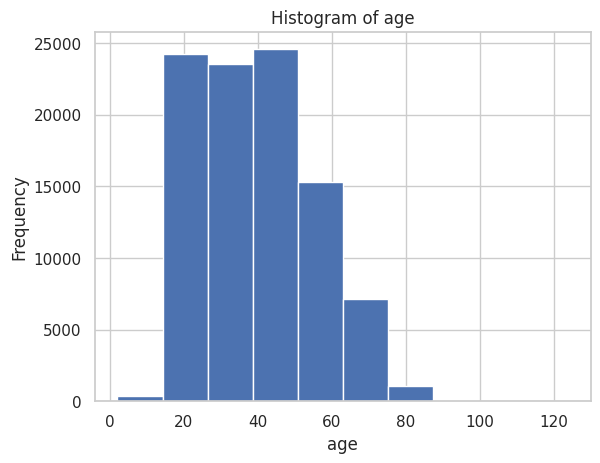

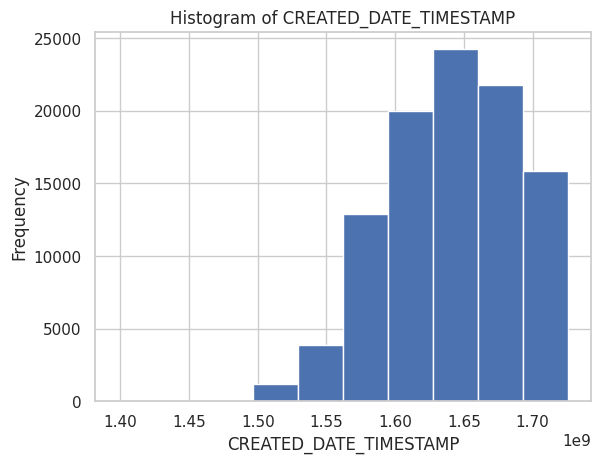

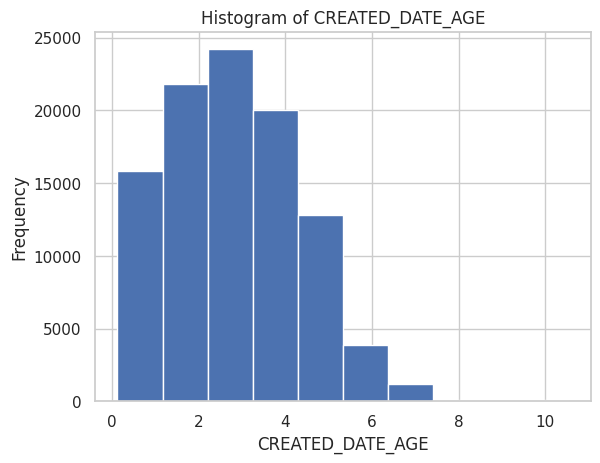

In [ ]:
import matplotlib.pyplot as plt

for i in users_df.columns:
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(users_df[i]):
        users_df[i].hist()
        plt.title(f'Histogram of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    # Check if the column contains datetime data
    elif pd.api.types.is_datetime64_any_dtype(users_df[i]):
        # Convert datetime to numerical representation (e.g., timestamps)
        # Assuming 'CREATED_DATE' is the datetime column
        if i == 'CREATED_DATE':
            now = datetime.now().astimezone()
            users_df['CREATED_DATE_AGE'] = (now - users_df['CREATED_DATE']).dt.days/365
            users_df['CREATED_DATE_AGE'].hist()
            plt.title(f'Histogram of {i}')
            plt.xlabel(i)
            plt.ylabel('Frequency')
            plt.show()
    else:
        print(f"Skipping column '{i}' as it is not numerical or datetime.")